In [14]:
import pandas as pd

from utils import run_classifier, print_classifier_metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

from xgboost import XGBClassifier

In [15]:
df = pd.read_csv('data/diabetes.csv')

In [16]:
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = df['Outcome']

In [17]:
all_combos = []

all_combos.append(df[['Pregnancies', 'Glucose']])
all_combos.append(df[['Insulin', 'BMI']])
all_combos.append(df[['Pregnancies', 'BloodPressure', 'SkinThickness']])
all_combos.append(df[['Glucose', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']])

for combo in all_combos:
    print(run_classifier(LogisticRegression(), combo, y, split_random_state=123, model_description=":".join(combo.columns.to_list())))

'Pregnancies:Glucose',0.678,0.481,0.563,0.744,0.789,0.517,0.625,0.766
'Insulin:BMI',0.564,0.271,0.367,0.679,0.632,0.207,0.312,0.656
'Pregnancies:BloodPressure:SkinThickness',0.633,0.181,0.281,0.684,0.706,0.207,0.320,0.669
'Glucose:BloodPressure:Insulin:BMI:DiabetesPedigreeFunction',0.701,0.524,0.599,0.761,0.821,0.552,0.660,0.786


In [18]:
print(run_classifier(DecisionTreeClassifier(), X, y, split_random_state=123, model_description="default"))

for i in range(6,2,-1):
    print(run_classifier(DecisionTreeClassifier(max_depth=i, random_state=100, criterion='gini'), X, y, split_random_state=123, model_description=f"gini:max_depth={i}"))

for i in range(6,2,-1):
    print(run_classifier(DecisionTreeClassifier(max_depth=i, random_state=100, criterion='entropy'), X, y, split_random_state=123, model_description=f"entropy:max_depth={i}"))

'default',1.000,1.000,1.000,1.000,0.667,0.793,0.724,0.773
'gini:max_depth=6',0.808,0.781,0.794,0.862,0.745,0.707,0.726,0.799
'gini:max_depth=5',0.780,0.710,0.743,0.832,0.736,0.672,0.703,0.786
'gini:max_depth=4',0.712,0.695,0.704,0.800,0.717,0.655,0.685,0.773
'gini:max_depth=3',0.739,0.471,0.576,0.762,0.806,0.431,0.562,0.747
'entropy:max_depth=6',0.760,0.786,0.773,0.842,0.597,0.638,0.617,0.701
'entropy:max_depth=5',0.707,0.781,0.742,0.814,0.636,0.724,0.677,0.740
'entropy:max_depth=4',0.687,0.690,0.689,0.787,0.679,0.621,0.649,0.747
'entropy:max_depth=3',0.777,0.414,0.540,0.759,0.885,0.397,0.548,0.753


In [19]:
all_combos = []

all_combos.append([5, 10])
all_combos.append([5, 100])
all_combos.append([4, 200])
all_combos.append([3, 50])
print(run_classifier(RandomForestClassifier(random_state=100, max_depth=4), X, y, split_random_state=123, model_description="default:max_depth=4"))

for combo in all_combos:
    print(run_classifier(RandomForestClassifier(max_depth=combo[0], n_estimators=combo[1], random_state=100), X, y, split_random_state=123, 
                         model_description=f"n_estimators={combo[1]}:max_depth={combo[0]}"))

'default:max_depth=4',0.838,0.590,0.693,0.821,0.805,0.569,0.667,0.786
'n_estimators=10:max_depth=5',0.844,0.619,0.714,0.831,0.783,0.621,0.692,0.792
'n_estimators=100:max_depth=5',0.880,0.662,0.755,0.853,0.800,0.621,0.699,0.799
'n_estimators=200:max_depth=4',0.852,0.605,0.708,0.829,0.821,0.552,0.660,0.786
'n_estimators=50:max_depth=3',0.819,0.538,0.649,0.801,0.833,0.517,0.638,0.779


In [20]:
gbs = []

gbs.append([4, 200, 0.01])
gbs.append([3, 100, 0.02])
gbs.append([3, 100, 1])
gbs.append([3, 100, 0.01])
gbs.append([3, 100, 0.005])
gbs.append([4, 100, 0.005])
gbs.append([3, 100, 0.1])

print(run_classifier(GradientBoostingClassifier(), X, y, split_random_state=123, model_description="default"))

for xgboost in gbs:
    print(run_classifier(GradientBoostingClassifier(max_depth=xgboost[0], n_estimators=xgboost[1], learning_rate=xgboost[2], random_state=123),
                         X, y, split_random_state=123,
                         model_description=f"max_depth={xgboost[0]}:n_estimators={xgboost[1]}:learning_rate={xgboost[2]}"))

'default',0.935,0.829,0.879,0.922,0.733,0.759,0.746,0.805
'max_depth=4:n_estimators=200:learning_rate=0.01',0.884,0.690,0.775,0.863,0.766,0.621,0.686,0.786
'max_depth=3:n_estimators=100:learning_rate=0.02',0.829,0.624,0.712,0.827,0.778,0.603,0.680,0.786
'max_depth=3:n_estimators=100:learning_rate=1',1.000,1.000,1.000,1.000,0.641,0.707,0.672,0.740
'max_depth=3:n_estimators=100:learning_rate=0.01',0.877,0.476,0.617,0.798,0.838,0.534,0.653,0.786
'max_depth=3:n_estimators=100:learning_rate=0.005',0.906,0.276,0.423,0.743,0.944,0.293,0.447,0.727
'max_depth=4:n_estimators=100:learning_rate=0.005',0.923,0.343,0.500,0.765,0.895,0.293,0.442,0.721
'max_depth=3:n_estimators=100:learning_rate=0.1',0.935,0.829,0.879,0.922,0.733,0.759,0.746,0.805


In [21]:
adas = []

adas.append([200, 0.01])
adas.append([100, 0.02])
adas.append([100, 1])
adas.append([100, 0.01])
adas.append([100, 0.005])
adas.append([100, 0.005])
adas.append([100, 0.1])

print(run_classifier(AdaBoostClassifier(), X, y, split_random_state=123, model_description="default"))

for model in adas:
    print(run_classifier(GradientBoostingClassifier(n_estimators=model[0], learning_rate=model[1], random_state=123),
                         X, y, split_random_state=123,
                         model_description=f"n_estimators={model[0]}:learning_rate={model[1]}"))

'default',0.726,0.605,0.660,0.787,0.745,0.655,0.697,0.786
'n_estimators=200:learning_rate=0.01',0.820,0.629,0.712,0.826,0.778,0.603,0.680,0.786
'n_estimators=100:learning_rate=0.02',0.829,0.624,0.712,0.827,0.778,0.603,0.680,0.786
'n_estimators=100:learning_rate=1',1.000,1.000,1.000,1.000,0.641,0.707,0.672,0.740
'n_estimators=100:learning_rate=0.01',0.877,0.476,0.617,0.798,0.838,0.534,0.653,0.786
'n_estimators=100:learning_rate=0.005',0.906,0.276,0.423,0.743,0.944,0.293,0.447,0.727
'n_estimators=100:learning_rate=0.005',0.906,0.276,0.423,0.743,0.944,0.293,0.447,0.727
'n_estimators=100:learning_rate=0.1',0.935,0.829,0.879,0.922,0.733,0.759,0.746,0.805


In [24]:
xgs = []

print(run_classifier(XGBClassifier(), X, y, split_random_state=123, model_description="default"))

#for model in adas:
#    print(run_classifier(GradientBoostingClassifier(n_estimators=model[0], learning_rate=model[1], random_state=123),
#                         X, y, split_random_state=123,
#                         model_description=f"n_estimators={model[0]}:learning_rate={model[1]}"))

'default',1.000,1.000,1.000,1.000,0.678,0.690,0.684,0.760


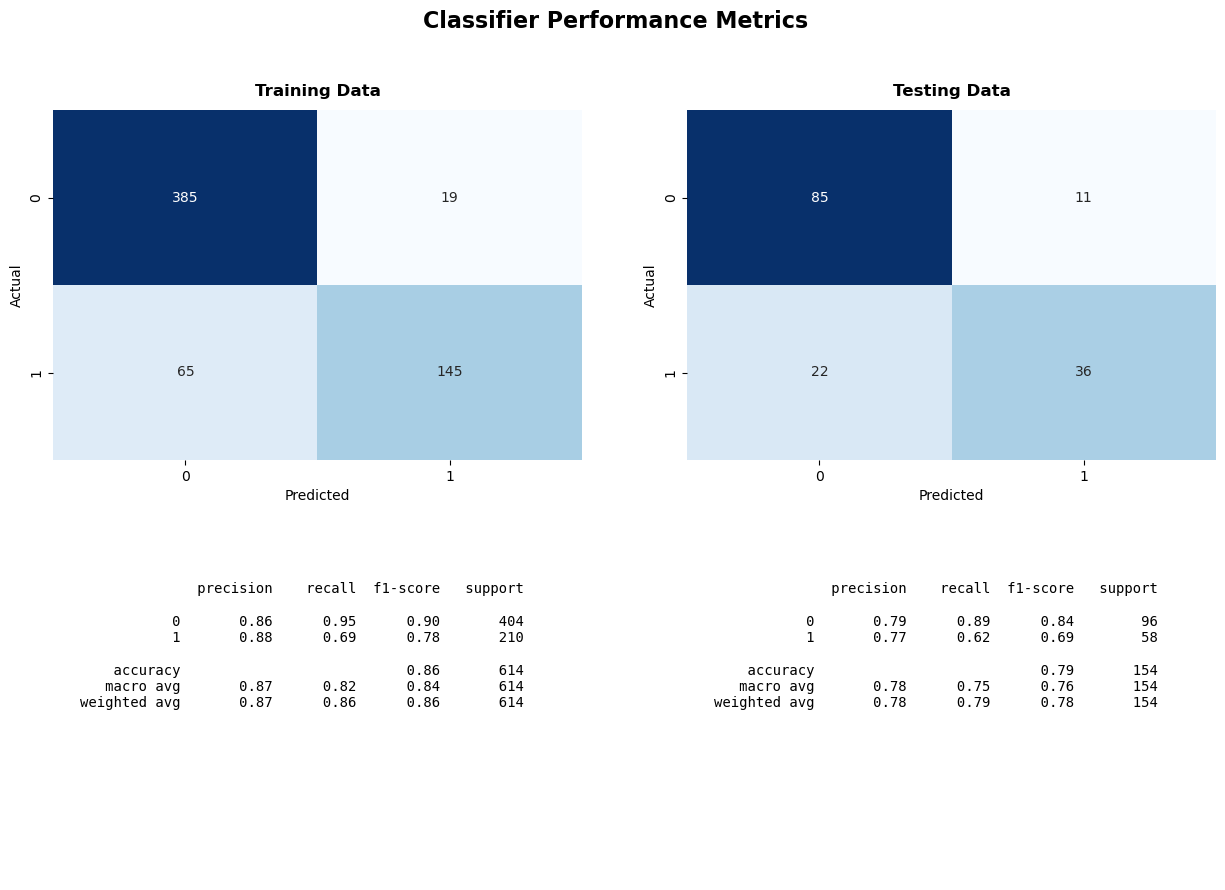

In [22]:
model = GradientBoostingClassifier(max_depth=4, n_estimators=200, learning_rate=0.01, random_state=123)

print_classifier_metrics(model, X, y, split_random_state=123)

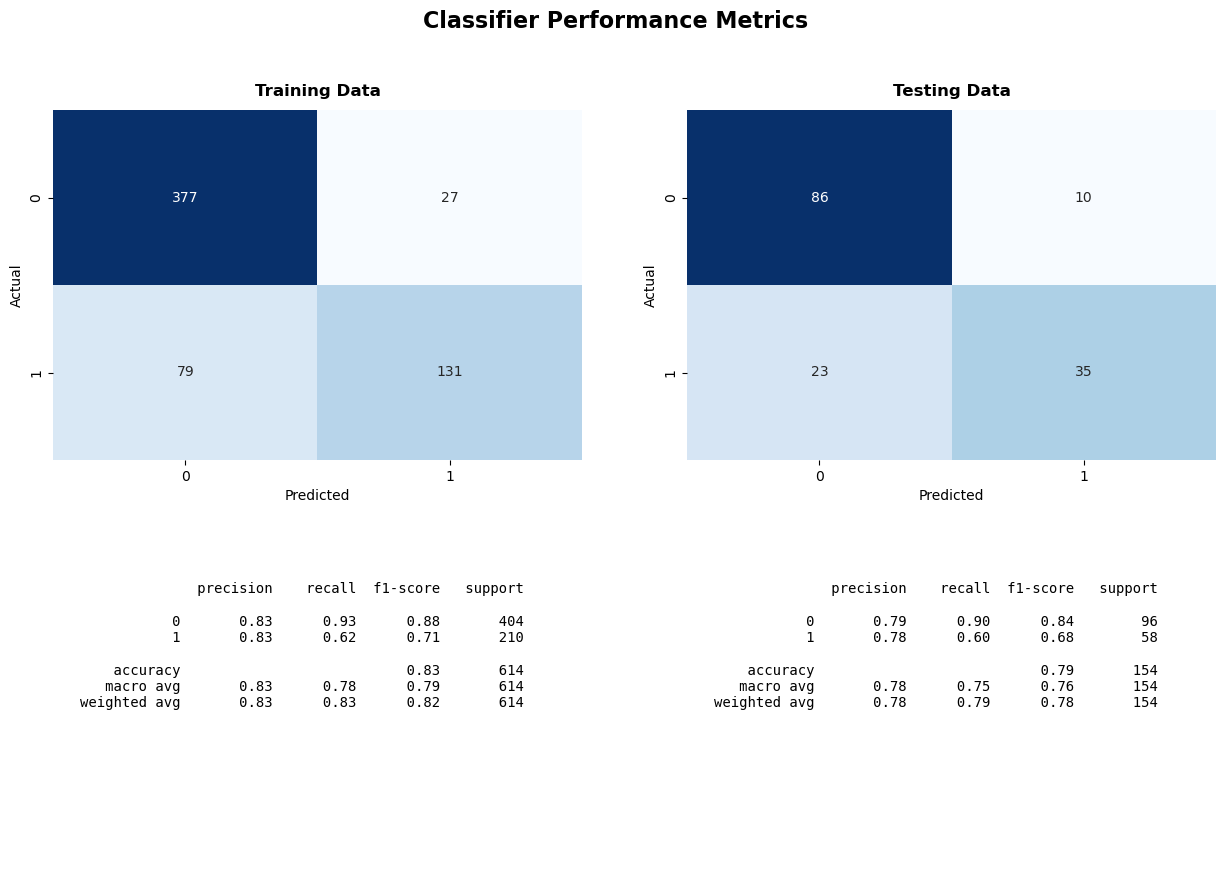

In [10]:
model = GradientBoostingClassifier(max_depth=3, n_estimators=100, learning_rate=0.02, random_state=123)

print_classifier_metrics(model, X, y, split_random_state=123)

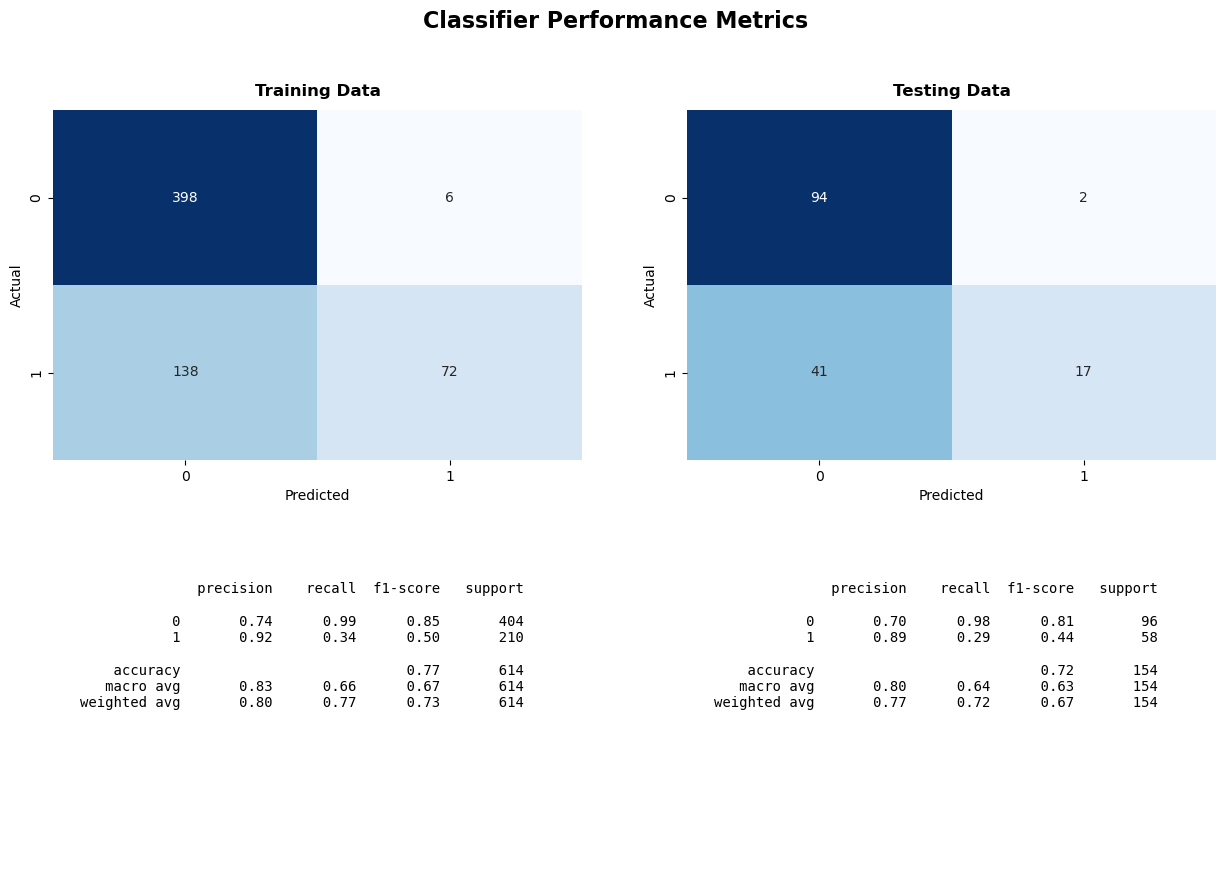

In [11]:
model = GradientBoostingClassifier(max_depth=4, n_estimators=50, learning_rate=0.01, random_state=123)

print_classifier_metrics(model, X, y, split_random_state=123)

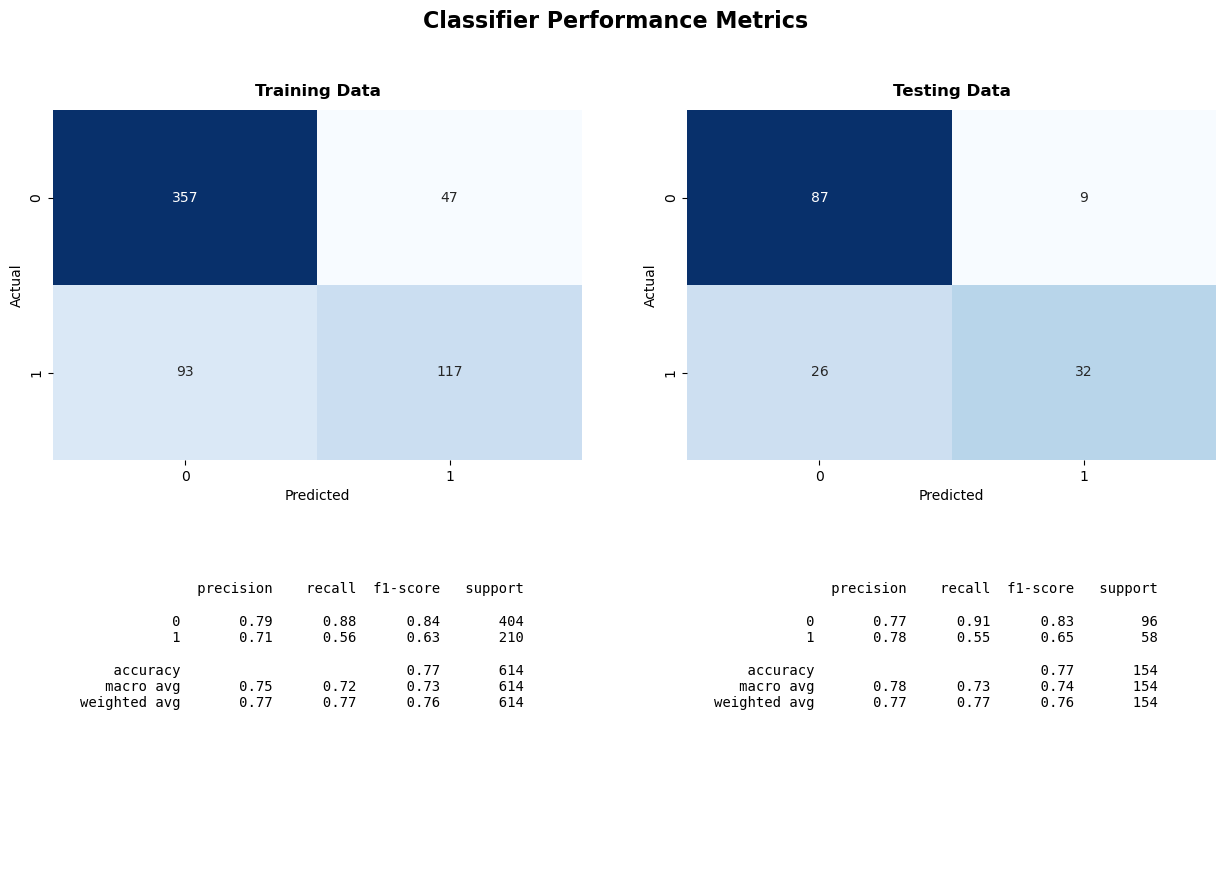

In [12]:
model = AdaBoostClassifier(n_estimators=100, learning_rate=0.5)
print_classifier_metrics(model, X, y, split_random_state=123)

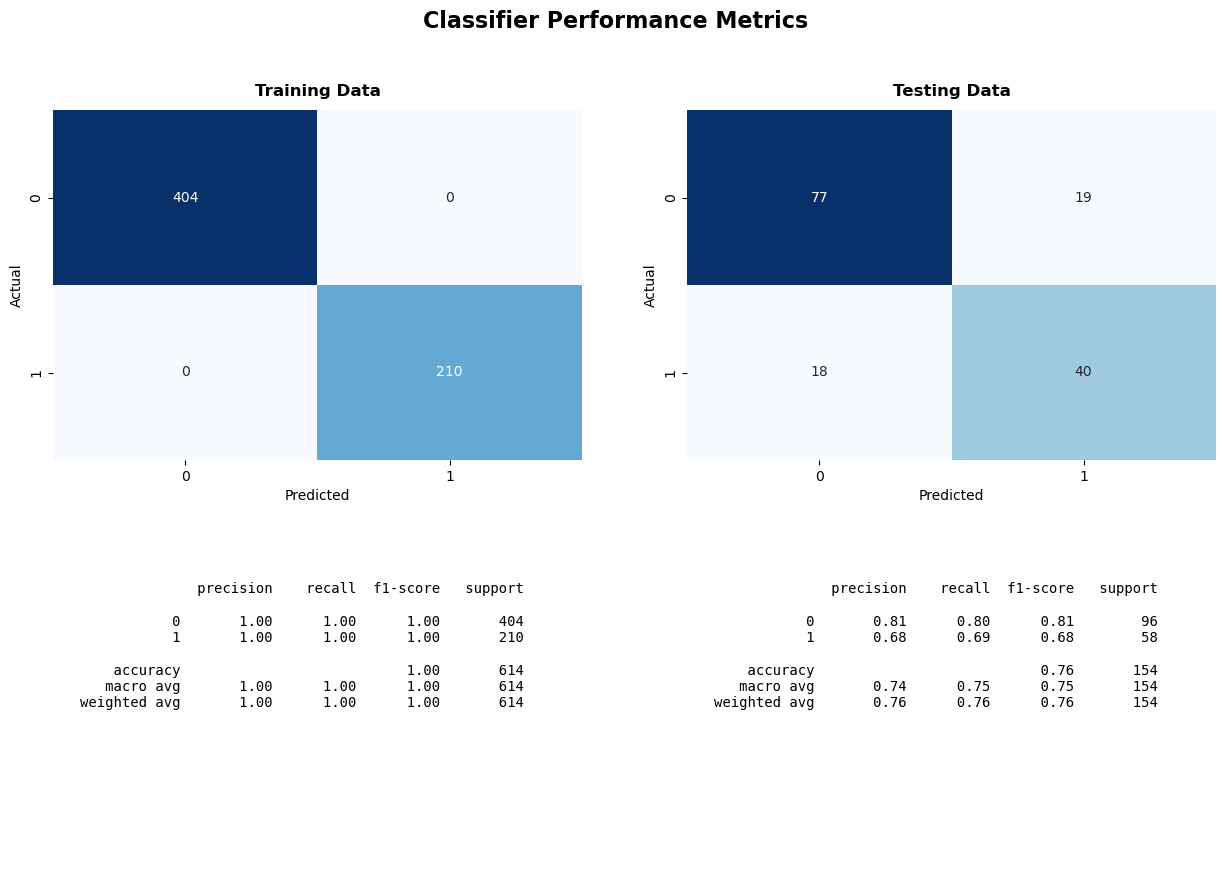

In [23]:
model = XGBClassifier()
print_classifier_metrics(model, X, y, split_random_state=123)